In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys, os
from pathlib import Path
# signalfuncなどのある親ディレクトリのパスを取得,これはJupyter系特有の書き方
current_dir = os.path.join(Path().resolve())
# モジュールのあるパスを追加
sys.path.append(str(current_dir) + '/../')
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

import ml_modules as mm

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from mlxtend.classifier import StackingClassifier
from scipy import interp

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
from skater.model import InMemoryModel
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import lightgbm as lgb
import xgboost as xgb

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [7]:
df_train_data = pd.read_csv('../data/wine_train.csv')
df_train_data = pd.get_dummies(df_train_data)

In [8]:
bins = [0,5,7,10]
labels = [0,1,2]

df_train_data['quality_range']=pd.cut(x=df_train_data['quality'], bins=bins, labels=labels)

In [9]:
details = mm.rstr(df_train_data, 'quality')
details

Data shape: (5497, 15)
___________________________
Data types:
 float64    4
int64      3
object     2
dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr quality
fixed.acidity,float64,5497,104,0,0.0,"[5.8, 5.4, 7.4, 7.0, 7.9, 6.1, 5.6, 6.2, 11.9,...",1.732083,5.146521,-0.077304
volatile.acidity,float64,5497,181,0,0.0,"[0.18, 0.835, 0.61, 0.31, 0.35, 0.15, 0.66, 0....",1.480543,2.825178,-0.266449
citric.acid,float64,5497,87,0,0.0,"[0.37, 0.08, 0.01, 0.26, 0.36, 0.29, 0.0, 0.48...",0.355286,1.379355,0.080977
residual.sugar,float64,5497,303,0,0.0,"[1.1, 1.2, 2.0, 7.4, 1.6, 6.2, 2.5, 2.8, 6.9, ...",1.486139,5.006813,-0.041976
chlorides,float64,5497,204,0,0.0,"[0.036000000000000004, 0.046, 0.07400000000000...",5.637169,54.706018,-0.200778
free.sulfur.dioxide,float64,5497,128,0,0.0,"[31.0, 13.0, 28.0, 11.0, 39.0, 7.0, 29.0, 6.0,...",1.298491,9.065928,0.056353
total.sulfur.dioxide,float64,5497,275,0,0.0,"[96.0, 93.0, 38.0, 160.0, 124.0, 151.0, 15.0, ...",0.023181,-0.327189,-0.037969
density,float64,5497,964,0,0.0,"[0.9894200000000001, 0.9924, 0.997479999999999...",0.589583,7.615904,-0.313193
pH,float64,5497,108,0,0.0,"[3.16, 3.57, 3.48, 3.13, 3.25, 3.6, 3.52, 3.33...",0.396733,0.416000,0.009871
sulphates,float64,5497,109,0,0.0,"[0.48, 0.85, 0.65, 0.46, 0.44, 0.58, 0.39, 0.5...",1.881176,9.585108,0.032083


In [10]:
x = df_train_data[list(set(df_train_data.columns)-set(['type_W','type_R','quality','quality_range']))]
# y = df_train_data['quality_range']
y = df_train_data['quality']

ss = StandardScaler()
scaled_x = pd.DataFrame(columns=x.columns,data=ss.fit_transform(x))

In [42]:
X_train, X_test, y_train, y_test \
= train_test_split(scaled_x, y, test_size=0.2, random_state=0)

In [12]:
clf = Pipeline([
        ('clf', LogisticRegression(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
n_components= [10, 12]
whiten = [True] #, False]
C =  [0.003, 0.009, 0.01]#, 0.1, 1.0, 10.0, 100.0, 1000.0]
tol = [0.001, 0.0001] # [1e-06, 5e-07, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]

param_grid =\
    [{'clf__C': C
     ,'clf__solver': ['liblinear', 'saga'] 
     ,'clf__penalty': ['l1', 'l2']
     ,'clf__tol' : tol 
     ,'clf__class_weight': [None, 'balanced']
},
    {'clf__C': C
     ,'clf__max_iter': [3, 9, 2, 7, 4]
     ,'clf__solver': ['newton-cg', 'sag', 'lbfgs']
     ,'clf__penalty': ['l2']
     ,'clf__tol' : tol 
     ,'clf__class_weight': [None, 'balanced'] 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
LR = Pipeline([
        #('sel', select_fetaures(select_cols=list(shadow))),
        ('scl', StandardScaler()),
        #('lda', LDA(store_covariance=True)),
        ('gs', gs)
 ]) 

In [13]:
LR.fit(X_train,y_train)

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 1140 out of 1140 | elapsed:   28.7s finished
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         LogisticRegression(C=1.0,
                                                                            class_weight=None,
                                                                            dual=False,
                                                                            fit_intercept=True,
                                                                            intercept_scaling=1,
                                                                            l1_ratio=None,
                                                                            max_iter=100,
                    

In [13]:
y 

0       6
1       7
2       5
3       6
4       5
5       6
6       5
7       8
8       5
9       6
10      6
11      4
12      6
13      7
14      6
15      7
16      5
17      5
18      5
19      7
20      6
21      6
22      5
23      5
24      5
25      7
26      6
27      6
28      5
29      6
       ..
5467    7
5468    5
5469    6
5470    7
5471    7
5472    6
5473    5
5474    5
5475    6
5476    5
5477    6
5478    6
5479    5
5480    6
5481    5
5482    5
5483    5
5484    5
5485    5
5486    5
5487    5
5488    8
5489    5
5490    7
5491    4
5492    5
5493    7
5494    5
5495    7
5496    5
Name: quality, Length: 5497, dtype: int64

Model Performance metrics:
------------------------------
Accuracy:  51.82% 
Precision: 49.24% 
Recall:    51.82% 
F1 Score:  45.17% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        38
           7       0.57      0.60      0.58       351
           4       0.49      0.75      0.59       473
           8       0.55      0.03      0.06       200
           3       0.00      0.00      0.00        32

    accuracy                           0.52      1100
   macro avg       0.27      0.23      0.21      1100
weighted avg       0.49      0.52      0.45      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                   
                   5  6    7    4  8  3
Actual: 5          0  0    1    5  0  0
        6          0  0   25   13  0  0
        7          0  0  210  140  1  0
 

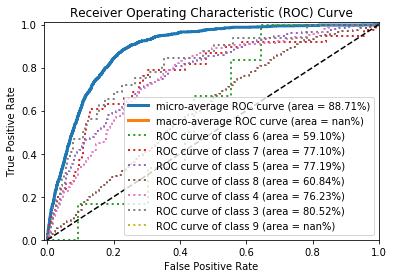

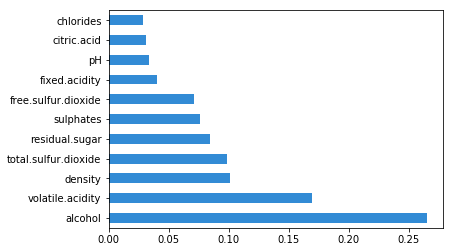

In [56]:
results = mm.get_results(LR,'LogisticRegression', X_test, y_test, gs = gs,target_names=[str(x) for x in y.unique()], reasume=True)

In [15]:
results

,Prob,CV Accuracy,Accuracy,ROC AUC Score,ROC Area
LogisticRegression,True,0.540823,0.5182,0.599071,NaN


In [16]:
clf = Pipeline([
        ('clf', DecisionTreeClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11] # [15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None] 

param_grid =\
    [{ 'clf__class_weight': class_weight
      ,'clf__criterion': criterion
      ,'clf__splitter': splitter
      ,'clf__max_depth': max_depth
      ,'clf__min_samples_leaf': min_samples_leaf
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
DT = Pipeline([
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [17]:
DT.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    2.8s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                            

Model Performance metrics:
------------------------------
Accuracy:  51.00% 
Precision: 49.10% 
Recall:    51.00% 
F1 Score:  48.57% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.08      0.03      0.04        38
           7       0.56      0.58      0.57       351
           4       0.50      0.66      0.57       473
           8       0.45      0.20      0.28       200
           3       0.38      0.16      0.22        32

    accuracy                           0.51      1100
   macro avg       0.33      0.27      0.28      1100
weighted avg       0.49      0.51      0.49      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                    
                   5  6    7    4   8  3
Actual: 5          0  1    3    2   0  0
        6          0  1   22   15   0  0
        7          2  7  202  129  10

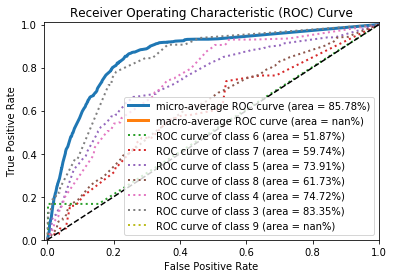

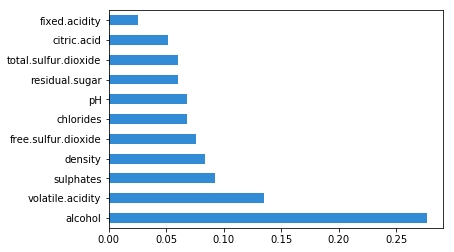

In [57]:
results = mm.get_results(DT, 'DT First', X_test, y_test, gs, [str(x) for x in y.unique()], results=results, reasume=False)

In [19]:
results

,Prob,CV Accuracy,Accuracy,ROC AUC Score,ROC Area
LogisticRegression,True,0.540823,0.5182,0.599071,NaN
DT First,True,0.551740,0.5100,0.609880,NaN


In [20]:
clf = Pipeline([('clf', SVC(random_state=101, kernel='linear', probability=True))])   

# a list of dictionaries to specify the parameters that we'd want to tune
n_components= [10, 12]
whiten = [True] #, False]
C =  [0.003, 0.009, 0.01]#, 0.1, 1.0, 10.0, 100.0, 1000.0]
tol = [0.001, 0.0001] # [1e-06, 5e-07, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]
gamma = ['scale', 'auto']


param_grid =\
    [{'clf__C': C
     ,'clf__tol' : tol 
     ,'clf__class_weight': [None, 'balanced']
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
svc = Pipeline([
        #('sel', select_fetaures(select_cols=list(shadow))),
        ('scl', StandardScaler()),
        #('lda', LDA(store_covariance=True)),
        ('gs', gs)
 ]) 

In [21]:
svc.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.0min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         SVC(C=1.0,
                                                             cache_size=200,
                                                             class_weight=None,
                                                             coef0=0.0,
                                                             decision_function_shape='ovr',
                                                             degree=3,
                                                             gamma='auto_deprecated',
                                                             kernel='linear',
                                    

Model Performance metrics:
------------------------------
Accuracy:  51.82% 
Precision: 39.38% 
Recall:    51.82% 
F1 Score:  44.32% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        38
           7       0.57      0.59      0.58       351
           4       0.49      0.77      0.60       473
           8       0.00      0.00      0.00       200
           3       0.00      0.00      0.00        32

    accuracy                           0.52      1100
   macro avg       0.18      0.23      0.20      1100
weighted avg       0.39      0.52      0.44      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                   
                   5  6    7    4  8  3
Actual: 5          0  0    1    5  0  0
        6          0  0   26   12  0  0
        7          0  0  208  143  0  0
 

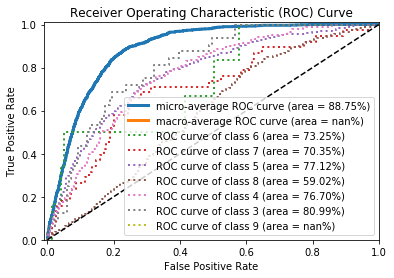

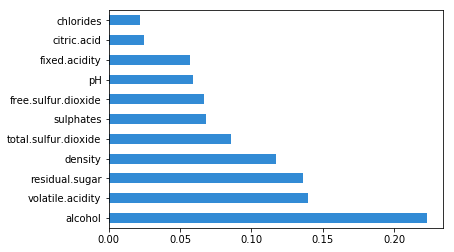

In [58]:
results = mm.get_results(svc,'LinearSVC', X_test, y_test, gs, [str(x) for x in y.unique()], results=results, reasume=False)

In [23]:
results

,Prob,CV Accuracy,Accuracy,ROC AUC Score,ROC Area
LogisticRegression,True,0.540823,0.5182,0.599071,NaN
DT First,True,0.551740,0.5100,0.609880,NaN
LinearSVC,True,0.539914,0.5182,0.597621,NaN


In [24]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', RandomForestClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = X_train.columns
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
criterion = ['gini', 'entropy']
class_weight = ['balanced', None] 
n_estimators = [155, 175]  
max_depth  = [20, None] #, 3, 4, 5, 10] # 
min_samples_split = [2, 3, 4]
min_samples_leaf = [1] #, 2 , 3]

param_grid =\
    [{ #'clf__class_weight': class_weight
      'clf__criterion': criterion
      ,'clf__n_estimators': n_estimators      
      ,'clf__min_samples_split': min_samples_split
      ,'clf__max_depth': max_depth
      #,'clf__min_samples_leaf': min_samples_leaf
      #,'pca__n_components' : n_components
      #,'pca__whiten' : whiten
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
RF = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)), 
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [25]:
RF.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.3min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         RandomForestClassifier(bootstrap=True,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                     

Model Performance metrics:
------------------------------
Accuracy:  64.27% 
Precision: 64.84% 
Recall:    64.27% 
F1 Score:  62.72% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.60      0.08      0.14        38
           7       0.68      0.71      0.69       351
           4       0.61      0.75      0.67       473
           8       0.66      0.46      0.54       200
           3       1.00      0.31      0.48        32

    accuracy                           0.64      1100
   macro avg       0.59      0.38      0.42      1100
weighted avg       0.65      0.64      0.63      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                     
                   5  6    7    4   8   3
Actual: 5          0  0    2    4   0   0
        6          0  3   24   11   0   0
        7          0  2  248   95

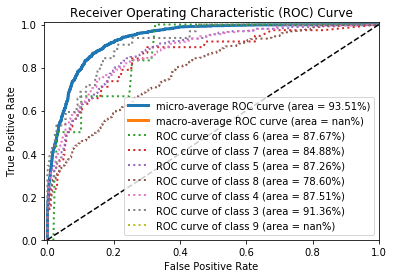

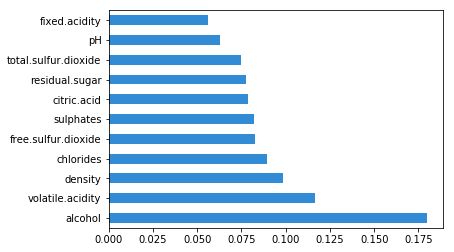

In [59]:
results = mm.get_results(RF, 'RF', X_test, y_test, gs, [str(x) for x in y.unique()], results=results, reasume=False)

In [27]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', KNeighborsClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]

param_grid =\
    [{'clf__n_neighbors': [10, 11, 12, 13] 
     ,'clf__weights': ['distance'] 
     ,'clf__algorithm' : ['ball_tree'] #, 'brute', 'auto',  'kd_tree', 'brute']
     ,'clf__leaf_size': [12, 11, 13]
     ,'clf__p': [1] 
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

KNNC = Pipeline([
#         ('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [28]:
KNNC.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         KNeighborsClassifier(algorithm='auto',
                                                                              leaf_size=30,
                                                                              metric='minkowski',
                                                                              metric_params=None,
                                                                              n_jobs=None,
                                                                              n_neighbors=5,
                                                                              p=2,
         

Model Performance metrics:
------------------------------
Accuracy:  63.64% 
Precision: 64.54% 
Recall:    63.64% 
F1 Score:  62.38% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       1.00      0.08      0.15        38
           7       0.66      0.71      0.69       351
           4       0.62      0.70      0.66       473
           8       0.62      0.53      0.57       200
           3       0.71      0.38      0.49        32

    accuracy                           0.64      1100
   macro avg       0.60      0.40      0.42      1100
weighted avg       0.65      0.64      0.62      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   5  6    7    4    8   3
Actual: 5          0  0    0    5    1   0
        6          0  3   23   11    1   0
        7          0  0  250 

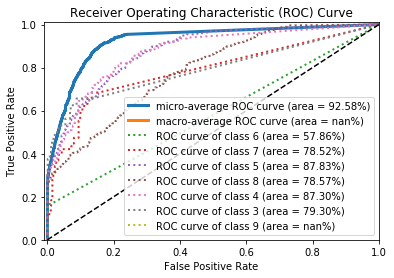

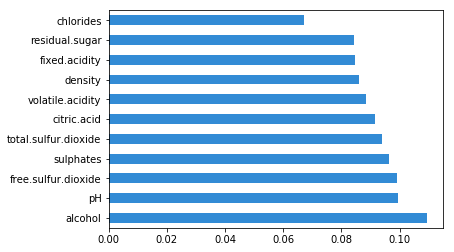

In [60]:
results = mm.get_results(KNNC, 'KNeighborsClassifier', X_test, y_test, gs, [str(x) for x in y.unique()],
                      results=results, reasume=False)

In [30]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', lgb.LGBMClassifier(objective='multiclass',
                        num_leaves = 31,
                        learning_rate=0.1,
                        min_child_samples=10,
                        n_estimators=100))])  

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = X_train.columns
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
criterion = ['gini', 'entropy']
class_weight = ['balanced', None] 
n_estimators = [155, 175]  
max_depth  = [20, None] #, 3, 4, 5, 10] # 
min_samples_split = [2, 3, 4]
min_samples_leaf = [1] #, 2 , 3]

param_grid =\
    [{ #'clf__class_weight': class_weight
      'clf__criterion': criterion
      ,'clf__n_estimators': n_estimators      
      ,'clf__min_samples_split': min_samples_split
      ,'clf__max_depth': max_depth
      #,'clf__min_samples_leaf': min_samples_leaf
      #,'pca__n_components' : n_components
      #,'pca__whiten' : whiten
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
GBM = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)), 
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [31]:
GBM.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.9min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         LGBMClassifier(boosting_type='gbdt',
                                                                        class_weight=None,
                                                                        colsample_bytree=1.0,
                                                                        importance_type='split',
                                                                        learning_rate=0.1,
                                                                        max_depth=-1,
                                                                        min_child_samples=10,
             

Model Performance metrics:
------------------------------
Accuracy:  62.45% 
Precision: 61.68% 
Recall:    62.45% 
F1 Score:  61.21% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.33      0.08      0.13        38
           7       0.65      0.68      0.67       351
           4       0.60      0.71      0.65       473
           8       0.64      0.48      0.55       200
           3       0.73      0.34      0.47        32

    accuracy                           0.62      1100
   macro avg       0.49      0.38      0.41      1100
weighted avg       0.62      0.62      0.61      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                     
                   5  6    7    4   8   3
Actual: 5          0  1    3    2   0   0
        6          0  3   26    9   0   0
        7          0  3  240  101

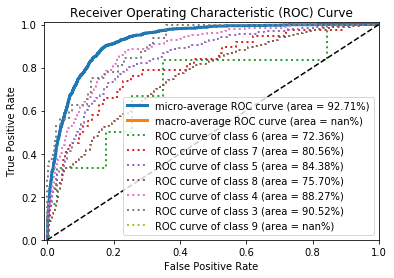

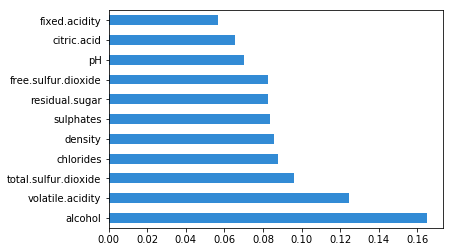

In [61]:
results = mm.get_results(GBM, 'LGBM', X_test, y_test, gs = gs, target_names = [str(x) for x in y.unique()],  results=results, reasume=False)

In [33]:
results

,Prob,CV Accuracy,Accuracy,ROC AUC Score,ROC Area
LogisticRegression,True,0.540823,0.5182,0.599071,NaN
DT First,True,0.551740,0.5100,0.609880,NaN
LinearSVC,True,0.539914,0.5182,0.597621,NaN
RF,True,0.657949,0.6427,0.714192,NaN
KNeighborsClassifier,True,0.632249,0.6364,0.714642,NaN
LGBM,True,0.631567,0.6245,0.703823,NaN


In [34]:
clf = Pipeline([
        ('clf', xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, n_jobs=1,
                       colsample_bytree=1, gamma=0.0001, max_delta_step=0, random_state=101, 
                       silent=True, subsample=1))])
n_est = [112] #112
max_depth = [15] 
learning_rate = [0.1] 
reg_lambda = [0.7] 
reg_alpha= [0.05]
booster = ['gbtree'] #  'dart'] #,'gblinear',
objective = ['multi:softmax'] #, 'multi:softprob']

param_grid =\
    [{ 
      'clf__n_estimators': n_est
      ,'clf__booster': booster
      ,'clf__objective': objective
      ,'clf__learning_rate': learning_rate
      ,'clf__reg_lambda': reg_lambda
      ,'clf__reg_alpha': reg_alpha
      ,'clf__max_depth': max_depth
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=3,
                  verbose=1, n_jobs=3)

XGBC = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)), 
        ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

In [35]:
XGBC.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   11.2s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=3, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         XGBClassifier(base_score=0.5,
                                                                       booster='gbtree',
                                                                       colsample_bylevel=1,
                                                                       colsample_bytree=1,
                                                                       gamma=0.0001,
                                                                       learning_rate=0.1,
                                                                       max_delta_step=0,
                                     

Model Performance metrics:
------------------------------
Accuracy:  64.55% 
Precision: 64.16% 
Recall:    64.55% 
F1 Score:  63.52% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       1.00      0.17      0.29         6
           6       0.31      0.11      0.16        38
           7       0.68      0.72      0.70       351
           4       0.63      0.72      0.67       473
           8       0.65      0.52      0.58       200
           3       0.73      0.34      0.47        32

    accuracy                           0.65      1100
   macro avg       0.67      0.43      0.48      1100
weighted avg       0.64      0.65      0.64      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   5  6    7    4    8   3
Actual: 5          1  2    2    1    0   0
        6          0  4   26    8    0   0
        7          0  3  251 

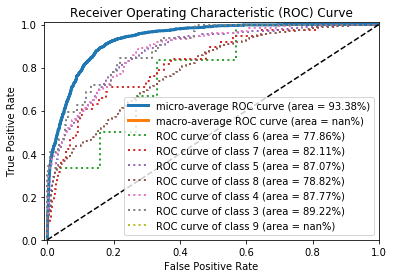

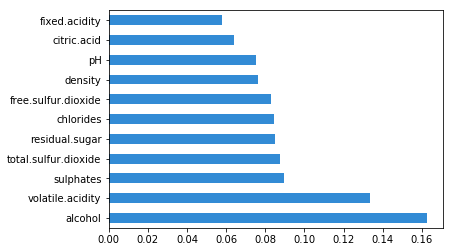

In [62]:
results = mm.get_results(XGBC, 'XGBC', X_test, y_test, gs, [str(x) for x in y.unique()], results=results,reasume=False)

In [37]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', GradientBoostingClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
#cv=None, dual=False,  scoring=None, refit=True,  multi_class='ovr'
SEL = X_train.columns
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
learning_rate =  [1e-02] #, 5e-03, 2e-02]
n_estimators= [400]
max_depth = [10]
n_comp = [2, 3, 4, 5]

param_grid =\
    [{'clf__learning_rate': learning_rate
     ,'clf__max_depth': max_depth
     ,'clf__n_estimators' : n_estimators 
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

GBC = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        ('gs', gs)
 ])  

In [38]:
GBC.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.4min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         GradientBoostingClassifier(criterion='friedman_mse',
                                                                                    init=None,
                                                                                    learning_rate=0.1,
                                                                                    loss='deviance',
                                                                                    max_depth=3,
                                                                                    max_features=None,
                                                   

Model Performance metrics:
------------------------------
Accuracy:  64.36% 
Precision: 64.42% 
Recall:    64.36% 
F1 Score:  63.30% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.50      0.17      0.25         6
           7       0.33      0.13      0.19        38
           5       0.69      0.67      0.68       351
           8       0.62      0.76      0.68       473
           4       0.67      0.47      0.56       200
           3       0.79      0.34      0.48        32
           9       0.00      0.00      0.00         0

    accuracy                           0.64      1100
   macro avg       0.51      0.36      0.41      1100
weighted avg       0.64      0.64      0.63      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                        
                   6  7    5    8   4   3  9
Actual: 6          1  0    2    2   1   0  0
        7   

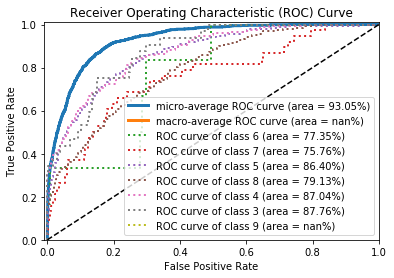

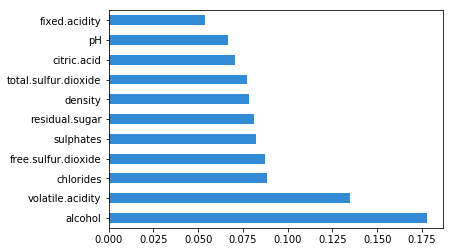

In [63]:
results = mm.get_results(GBC, 'GradientBoostingClassifier', X_test, y_test, gs, [str(x) for x in y.unique()]
                      ,results=results, reasume=False)

In [40]:
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', AdaBoostClassifier(random_state=101))])

# a list of dictionaries to specify the parameters that we'd want to tune
n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
whiten = [True, False]
n_comp = [2, 3, 4, 5]

param_grid =\
    [{'clf__learning_rate': [2e-01, 15e-02]
     ,'clf__n_estimators': [500, 600, 700] 
     ,'clf__algorithm' : ['SAMME.R'] # 'SAMME'
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     #,'lda__n_components': n_comp
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

ADAB = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        #('lda', LDA(store_covariance=True)),
        ('gs', gs)
 ])  

In [41]:
ADAB.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.1s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf',
                                                         AdaBoostClassifier(algorithm='SAMME.R',
                                                                            base_estimator=None,
                                                                            learning_rate=1.0,
                                                                            n_estimators=50,
                                                                            random_state=101))],
                                                 verbose=False),
                              iid='warn', n_jobs=-1,
                              param_grid=[{'clf__algorithm': ['

Model Performance metrics:
------------------------------
Accuracy:  27.36% 
Precision: 38.60% 
Recall:    27.36% 
F1 Score:  28.90% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         6
           6       0.04      0.45      0.08        38
           7       0.35      0.07      0.12       351
           4       0.48      0.47      0.47       473
           8       0.37      0.19      0.25       200
           3       0.00      0.00      0.00        32

    accuracy                           0.27      1100
   macro avg       0.21      0.20      0.15      1100
weighted avg       0.39      0.27      0.29      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                     
                   5    6   7    4   8  3
Actual: 5          0    4   1    1   0  0
        6          3   17   1   16   1  0
        7         32  196  25   9

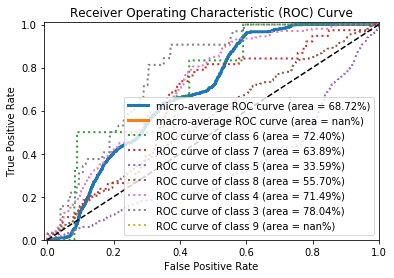

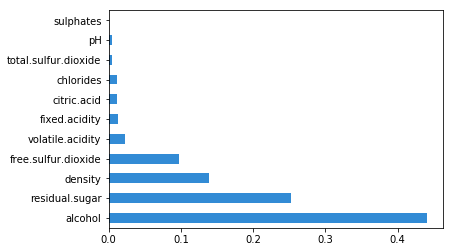

In [64]:
results = mm.get_results(ADAB, 'AdaBoostClassifier', X_test, y_test, gs, [str(x) for x in y.unique()]
                      , results=results, reasume=False)

In [43]:
results

,Prob,CV Accuracy,Accuracy,ROC AUC Score,ROC Area
LogisticRegression,True,0.540823,0.5182,0.599071,NaN
DT First,True,0.551740,0.5100,0.609880,NaN
LinearSVC,True,0.539914,0.5182,0.597621,NaN
RF,True,0.657949,0.6427,0.714192,NaN
KNeighborsClassifier,True,0.632249,0.6364,0.714642,NaN
LGBM,True,0.631567,0.6245,0.703823,NaN
XGBC,True,0.624517,0.6455,0.722111,NaN
GradientBoostingClassifier,True,0.635888,0.6436,0.717340,NaN
AdaBoostClassifier,True,0.229702,0.2736,0.530701,NaN


In [50]:
corr = X.corr()

NameError: name 'X' is not defined

In [0]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=True, cbar=True, cmap='coolwarm', square=True, fmt='.2f', ax=ax)

In [0]:
model = smf.OLS(y, X)
result = model.fit()

## 重回帰分析の結果から特徴量を選定する
- Adj. R-squared：自由度調整済み決定係数  
回帰式全体の精度,説明力,説明変数が増えると、決定係数(R-squared)は大きくなる.(目標は**0.85**くらい)
- t：各説明変数ごとの統計量  
絶対値が大きければ大きいほど、目的変数に与える影響が大きい.  
constというカラム名は、X = sm.add_constant(x)で生成した『y切片』のことなので、無視
- p>|t|：各説明変数ごとのp値  
0に近づけば近づくほど統計的な意味があり、逆に0.05よりも大きい値であればたまたまである可能性が高い.その説明変数は採用しないほうが良い.

In [0]:
result.summary()

In [0]:
X.drop('chlorides', axis=1, inplace=True)

In [0]:
model = smf.OLS(y, X)
result = model.fit()

In [0]:
result.summary()

In [0]:
X.drop('citric.acid', axis=1, inplace=True)

In [0]:
model = smf.OLS(y, X)
result = model.fit()

In [0]:
result.summary()

In [0]:
X_train.drop('chlorides', axis=1, inplace=True)
X_test.drop('chlorides', axis=1, inplace=True)

In [0]:
sclf = StackingClassifier(classifiers=[RF, XGBC, GBM], # , XGBC
                          use_probas=False,
                          average_probas=False,
                          use_features_in_secondary=False,
                          meta_classifier= RF)

sclf.fit(X=X_train,y=y_train)

In [0]:
results = mm.get_results(sclf, 'sclf', X_test, y_test,[str(x) for x in y.unique()], results=results, reasume=False)

In [69]:
estimators = [
    ('GBC', GBC),
    ('rf', RF),
    ('knn', KNNC),
    ('gbm', GBM),
    ('xgb', XGBC),
    ('lr', LR),
    ('adab', ADAB),
    ('svc', svc)
    ]

In [75]:
voting = VotingClassifier(estimators,weights=[2, 1.5, 1.5, 1, 2, 0.5, 0.5, 0.5], voting='soft')

In [ ]:
voting.fit(X_train, y_train)

In [11]:
X_test = pd.read_csv('../data/X_test.csv', header=0, index_col=0)
y_test = pd.read_csv('../data/y_test.csv',names=('l'))

In [12]:
filename = '../model/multico_voting_model.pickle'

In [13]:
with open(filename, mode='rb') as fp:
    voting = pickle.load(fp)

In [14]:
results = pd.read_csv('../data/multico_results.csv', index_col=0, header=0)
results

,Accuracy,Prob,ROC AUC Score,ROC Area
LogisticRegression,0.5182,True,0.599071,NaN
DT First,0.5100,True,0.609880,NaN
LinearSVC,0.5182,True,0.597621,NaN
RF,0.6427,True,0.714192,NaN
KNeighborsClassifier,0.6364,True,0.714642,NaN
LGBM,0.6245,True,0.703823,NaN
XGBC,0.6455,True,0.722111,NaN
GradientBoostingClassifier,0.6436,True,0.717340,NaN
AdaBoostClassifier,0.2736,True,0.530701,NaN
voting2,0.6536,True,0.720668,NaN


Model Performance metrics:
------------------------------
Accuracy:  65.55% 
Precision: 66.58% 
Recall:    65.55% 
F1 Score:  64.06% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.62      0.77      0.69       473
           7       0.69      0.47      0.56       200
           5       0.69      0.70      0.70       351
           8       0.92      0.34      0.50        32
           4       0.60      0.08      0.14        38
           3       1.00      0.17      0.29         6
           9       0.00      0.00      0.00         0

   micro avg       0.66      0.66      0.66      1100
   macro avg       0.65      0.36      0.41      1100
weighted avg       0.67      0.66      0.64      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   6   7    5   8  4  3  9
Actual: 6        366  27   79   1  0  0  0
        7        1

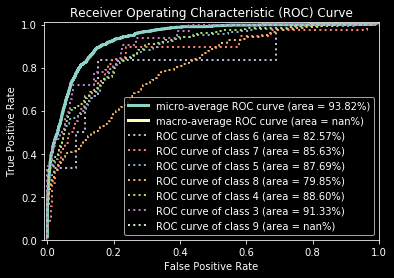

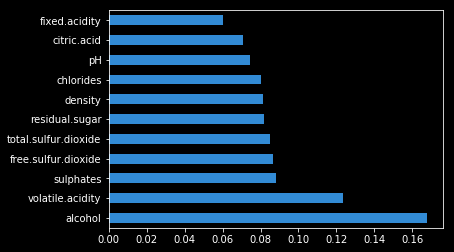

In [15]:
results = mm.get_results(voting, 'voting_test2', X_test, y_test['l'], target_labels = y.unique(), target_names=[str(x) for x in y.unique()],results=results, reasume=False)

In [16]:
results.to_csv('../data/multico_results.csv')

In [55]:
# with open(filename, mode='wb') as fp:
#     pickle.dump(voting, fp, protocol=2)